## House Price of India project
## Часть 2: EDA. Разведочный анализ данных 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

*В прошлой серии...* мы обработали наш датасет и получили следующее:

In [2]:
df = pd.read_csv('my_data.csv')

In [3]:
df

Number of bedrooms  Number of bathrooms  Living area  Lot area  \
0                       5                    3         3650      9050   
1                       4                    3         2920      4000   
2                       5                    3         2910      9480   
3                       4                    3         3310     42998   
4                       3                    2         2710      4500   
...                   ...                  ...          ...       ...   
14615                   2                    2         1556     20000   
14616                   3                    2         1680      7000   
14617                   2                    1         1070      6120   
14618                   4                    1         1030      6621   
14619                   3                    1          900      4770   

       Average Room Size  Floor Area Ratio  Number of floors  \
0                    730              0.40               2.0   
1                    730              0.73               1.5   
2                    582              0.31               1.5   
3                    827              0.08               2.0   
4                    903              0.60               1.5   
...                  ...               ...               ...   
14615                778              0.08               1.0   
14616                560              0.24               1.5   
14617                535              0.17               1.0   
14618                257              0.16               1.0   
14619                300              0.19               1.0   

       Waterfront present  Average views number  Condition of the house  \
0                       0                     4                       5   
1                       0                     0                       5   
2                       0                     0                       3   
3                       0                     0                       3   
4                       0                     0                       4   
...                   ...                   ...                     ...   
14615                   0                     0                       4   
14616                   0                     0                       4   
14617                   0                     0                       3   
14618                   0                     0                       4   
14619                   0                     0                       3   

       Built Year  House Age  Renovation Year Was Renovated  Postal Code  \
0            1921        102             1921            No       122003   
1            1909        114             1909            No       122004   
2            1939         84             1939            No       122004   
3            2001         22             2001            No       122005   
4            1929         94             1929            No       122006   
...           ...        ...              ...           ...          ...   
14615        1957         66             1957            No       122066   
14616        1968         55             1968            No       122072   
14617        1962         61             1962            No       122056   
14618        1955         68             1955            No       122042   
14619        1969         54             2009           Yes       122018   

       Number of schools nearby  Distance from the airport    Price  
0                             2                         58  2380000  
1                             2                         51  1400000  
2                             1                         53  1200000  
3                             3                         76   838000  
4                             1                         51   805000  
...                         ...                        ...      ...  
14615                         3                         7

Давайте взглянем сначала на общую картинку. С помощью парных графиков можно визуально оценить корреляцию различных параметров с ценой (самый правый столбец и самая нижняя строчка) и корреляцию между самими параметрами:

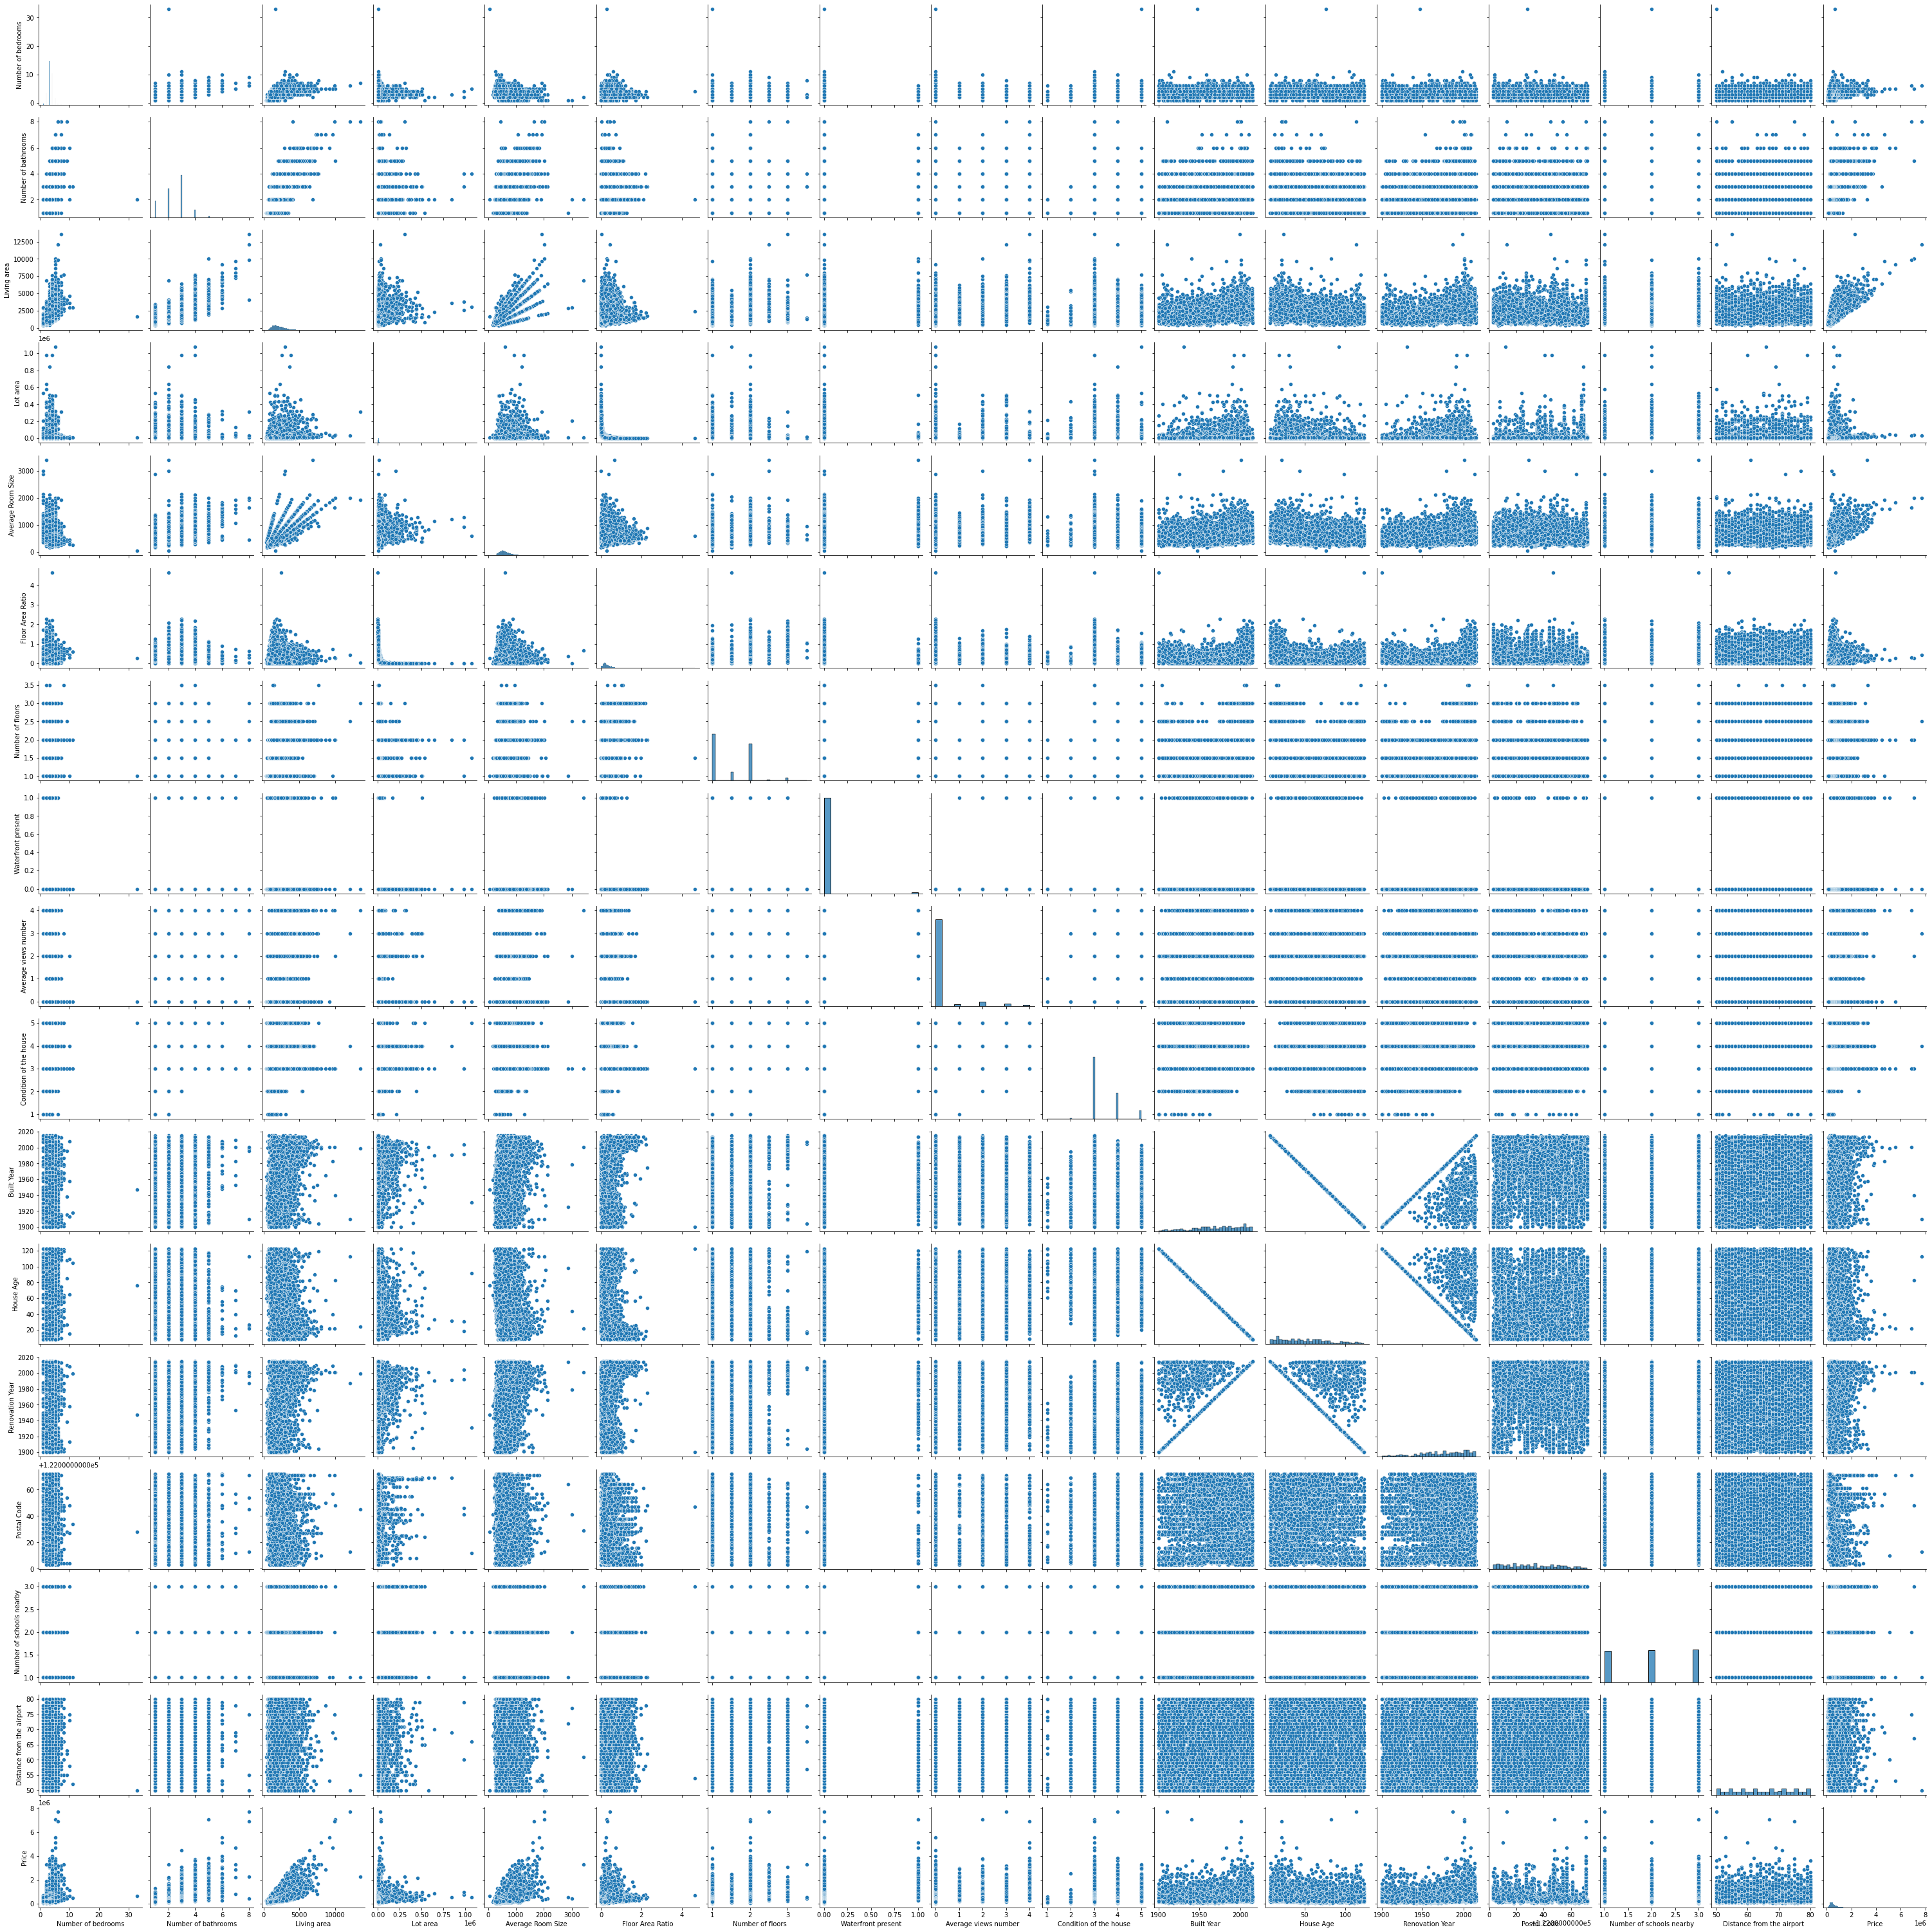

In [4]:
sns.pairplot(df)
plt.show()

Из данных диграмм рассеяния можно увидеть, что существует положительная корреляция с ценой у таких параметров как: жилая площадь и средняя площадь комнаты. 

Также можно заметить, что у многих параметров существуют *аномальные значения (выбросы)* (недвижимость по очень высокой цене, с очень большим количеством спален и огромнейшей площадью участка). 

Выбросы не ошибочны или случайны, так как вполне могут существовать дома с такими параметрами и продаваться по любой цене, которую выставит продавец (хотя нельзя не отрицать того, что продавцы могут и по ошибке ввести неправильные данные на сайте). 

Однако, как можно заметить по графикам, например, дома с очень большей площадью участка, продаются только по низкой цене:

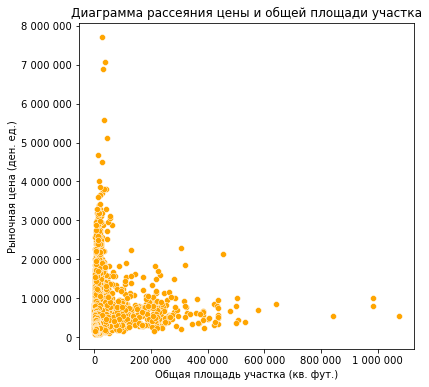

In [5]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.scatterplot(data = df, x = 'Lot area', y = 'Price', color = 'orange')

ax.set_yticklabels([' ', '0', '1 000 000', '2 000 000', '3 000 000', '4 000 000', 
                    '5 000 000', '6 000 000', '7 000 000', '8 000 000'])
ax.set_xticklabels([' ', '0', '200 000', '400 000', '600 000', '800 000', '1 000 000'])

plt.title('Диаграмма рассеяния цены и общей площади участка')
plt.xlabel('Общая площадь участка (кв. фут.)')
plt.ylabel('Рыночная цена (ден. ед.)')

plt.show()

Это наводит на мысль, что выставлен на продажу только земельный участок с маленькой пристройкой. 

Эту мысль можно потвердить диаграммой рассеяния жилой площади и общей площади участка:

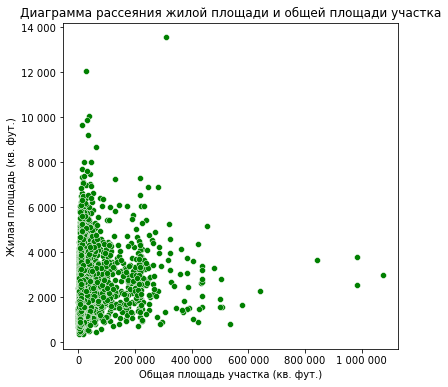

In [6]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.scatterplot(data = df, x = 'Lot area', y = 'Living area', color = 'green')

ax.set_yticklabels([' ', '0', '2 000', '4 000', '6 000', '8 000', 
                    '10 000', '12 000', '14 000'])
ax.set_xticklabels([' ', '0', '200 000', '400 000', '600 000', '800 000', '1 000 000'])

plt.title('Диаграмма рассеяния жилой площади и общей площади участка')
plt.xlabel('Общая площадь участка (кв. фут.)')
plt.ylabel('Жилая площадь (кв. фут.)')

plt.show()

Поэтому от выбросов мы избавимся - они искажают анализ, приводя к ошибочной интерпретации данных и могут впоследствии ввести в заблуждение процесс обучения алгоритмов машинного обучения, снизить точность модели и, в конечном итоге, ухудшить результаты.

Таким образом, исследовать элитную недвижимость по очень высокой цене (их очень мало относительно всего датасета, как потом мы посчитаем - всего 269 (0.018 % от общего количества), поэтому исследовать их отдельно как будто не имеет смысла из-за небольшого количества данных), а также огромные земельные участки мы не будем.  

---

## Избавляемся от выбросов и ошибочных данных, смотрим на распределение

In [7]:
df.describe().T

count           mean            std       min  \
Number of bedrooms         14620.0       3.379343       0.938719       1.0   
Number of bathrooms        14620.0       2.457387       0.922707       1.0   
Living area                14620.0    2098.262996     928.275721     370.0   
Lot area                   14620.0   15093.281122   37919.621304     520.0   
Average Room Size          14620.0     622.275103     218.160491      49.0   
Floor Area Ratio           14620.0       0.326753       0.269809       0.0   
Number of floors           14620.0       1.502360       0.540239       1.0   
Waterfront present         14620.0       0.007661       0.087193       0.0   
Average views number       14620.0       0.233105       0.766259       0.0   
Condition of the house     14620.0       3.430506       0.664151       1.0   
Built Year                 14620.0    1970.926402      29.493625    1900.0   
House Age                  14620.0      52.073598      29.493625       8.0   
Renovation Year            14620.0    1973.505677      28.892003    1900.0   
Postal Code                14620.0  122033.062244      19.082418  122003.0   
Number of schools nearby   14620.0       2.012244       0.817284       1.0   
Distance from the airport  14620.0      64.950958       8.936008      50.0   
Price                      14620.0  538932.218331  367532.380804   78000.0   

                                 25%        50%        75%         max  
Number of bedrooms              3.00       3.00       4.00       33.00  
Number of bathrooms             2.00       3.00       3.00        8.00  
Living area                  1440.00    1930.00    2570.00    13540.00  
Lot area                     5010.75    7620.00   10800.00  1074218.00  
Average Room Size             470.75     580.00     726.00     3420.00  
Floor Area Ratio                0.16       0.25       0.41        4.65  
Number of floors                1.00       1.50       2.00        3.50  
Waterfront present              0.00       0.00       0.00        1.00  
Average views number            0.00       0.00       0.00        4.00  
Condition of the house          3.00       3.00       4.00        5.00  
Built Year                   1951.00    1975.00    1997.00     2015.00  
House Age                      26.00      48.00      72.00      123.00  
Renovation Year              1954.00    1978.00    1999.00     2015.00  
Postal Code                122017.00  122032.00  122048.00   122072.00  
Number of schools nearby        1.00       2.00       3.00        3.00  
Distance from the airport      57.00      65.00      73.00       80.00  
Price                      320000.00  450000.00  645000.00  7700000.00

Первым делом проверим на выборосы параметр **Price**, построив для него *диаграмму размаха (ящик с усами)*. Значения, которые выходят за пределов усов - выбросы.

### Параметр Price 

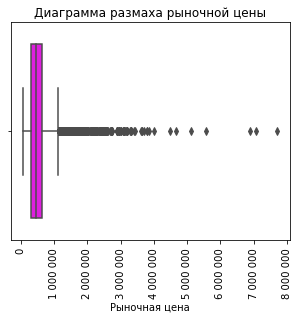

In [8]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Price'], color = 'fuchsia')

xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation = 90)
ax.set_xticklabels([' ', '0', '1 000 000', '2 000 000', '3 000 000', '4 000 000', 
                    '5 000 000', '6 000 000', '7 000 000', '8 000 000'])

plt.title('Диаграмма размаха рыночной цены')
plt.xlabel('Рыночная цена')

plt.show()

Как видно по диаграмме - выбросы есть. Для исключения выборосов мы не можем считать *стандартизированную оценку (z-оценка)*, так как распределение цены (и других параметров) даже приблизительно не нормальное. Будем использовать *межквартильный метод* со значением 3 для определения только экстремальных выбросов.

In [9]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

IQR = Q3 - Q1

print(len(df[(df['Price'] < Q1 - 3 * IQR) | (df['Price'] > Q3 + 3 * IQR)]))

269


Таким образом, есть 269 выбросов в значениях параметра. Избавимся от этих строк:

In [10]:
df = df[(df['Price'] > (Q1 - 3 * IQR)) & (df['Price'] < (Q3 + 3 * IQR))]

Новая диаграмма размаха:

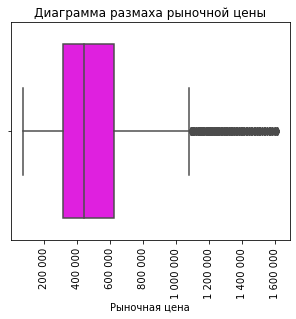

In [11]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Price'], color = 'fuchsia')

xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation = 90)
ax.set_xticklabels([' ', '200 000', '400 000', '600 000', '800 000', 
                    '1 000 000', '1 200 000', '1 400 000', '1 600 000'])

plt.title('Диаграмма размаха рыночной цены')
plt.xlabel('Рыночная цена')

plt.show()

50% домов имеют рыночную цену от 312 500 до 615 000 ден. ед.

---

Проведём аналогичную работу с параметром **Lot area**:

### Параметр Lot area

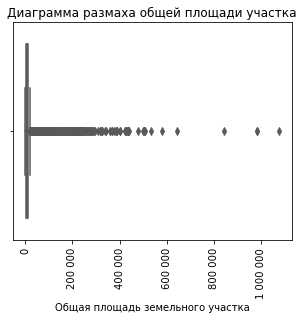

In [12]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Lot area'], color = 'mediumorchid')

xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation = 90)
ax.set_xticklabels([' ', '0', '200 000', '400 000', '600 000', '800 000', '1 000 000'])

plt.title('Диаграмма размаха общей площади участка')
plt.xlabel('Общая площадь земельного участка')

plt.show()

Избавляемся от выбросов:

In [13]:
Q1 = df['Lot area'].quantile(0.25)
Q3 = df['Lot area'].quantile(0.75)

IQR = Q3 - Q1

print(len(df[(df['Lot area'] < Q1 - 3 * IQR) | (df['Lot area'] > Q3 + 3 * IQR)]))
df = df[(df['Lot area'] > (Q1 - 3 * IQR)) & (df['Lot area'] < (Q3 + 3 * IQR))]

1227


Новая диаграмма размаха:

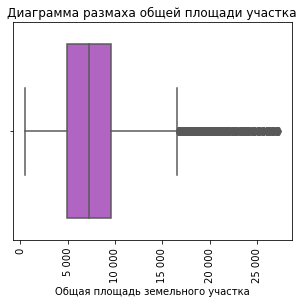

In [14]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Lot area'], color = 'mediumorchid')

xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation = 90)
ax.set_xticklabels([' ', '0', '5 000', '10 000', '15 000', '20 000', '25 000'])

plt.title('Диаграмма размаха общей площади участка')
plt.xlabel('Общая площадь земельного участка')

plt.show()

Избавились от 1227 аномальных значений. 50% домов имеют общий участок площадью от 4 925 до 9 600 кв. фут.

На этом работу с аномальными значениями можем считать законченной.

---

Давайте посмотрим на *диаграммы размаха* других параметров:

### Параметр Number of befrooms

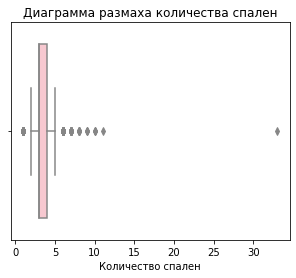

In [15]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Number of bedrooms'], color = 'pink')

plt.title('Диаграмма размаха количества спален')
plt.xlabel('Количество спален')

plt.show()

Тут у нас явно выбивается дом с 33 спальнями. Остальные дома имеют в основном от 3 до 5 спален.

---

### Параметр **Number of bathrooms**

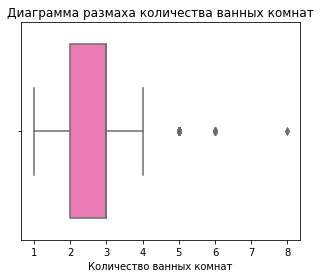

In [16]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Number of bathrooms'], color = 'hotpink')

plt.title('Диаграмма размаха количества ванных комнат')
plt.xlabel('Количество ванных комнат')

plt.show()

Есть дом аж с 8 ванными комнатами. 50% домов имеют от 2 до 3 ванных комнат. 

---

### Параметр **Living area**

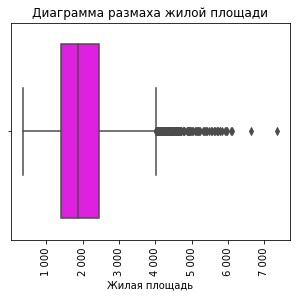

In [17]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Living area'], color = 'magenta')

xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation = 90)
ax.set_xticklabels([' ', '1 000', '2 000', '3 000', '4 000', '5 000', '6 000', '7 000'])

plt.title('Диаграмма размаха жилой площади')
plt.xlabel('Жилая площадь')

plt.show()

Около половины домов имеют жилую площадь от 1 500 до 2 500 кв. фут. Есть несколько домов с жилой площадью большей 6 000 кв. фут.

---

### Параметр Average Room Size

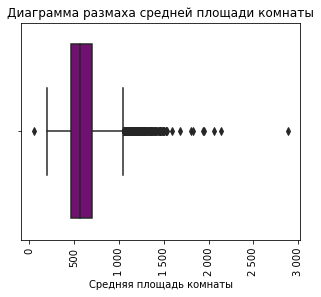

In [18]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Average Room Size'], color = 'purple')

xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation = 90)
ax.set_xticklabels([' ', '0', '500', '1 000', '1 500', '2 000', '2 500', '3 000'])

plt.title('Диаграмма размаха средней площади комнаты')
plt.xlabel('Средняя площадь комнаты')

plt.show()

Тут у нас явно выбивается дом с средним размером комнаты равным 2 880 кв. фут. У 50% домов средний размер комнаты от 463 до 697 кв. фут.

---

### Параметр Floor Area Ratio

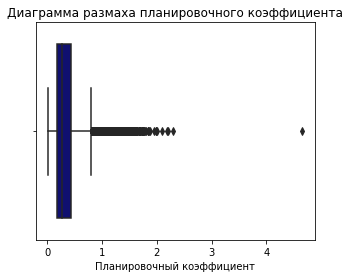

In [19]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Floor Area Ratio'], color = 'navy')

plt.title('Диаграмма размаха планировочного коэффициента')
plt.xlabel('Планировочный коэффициент')

plt.show()

Как мы помним, планировочный коэффициент находится делением жилой площади дома на общую площадь участка. Он нужен, чтобы оценить экономичность планировки дома. 

50% домов имеют планировочный коэффициент от 0,18 до 0,43. Однако есть дома, у которых он больше 1. Такое может быть, только если данные были внесены ошибочно, так как жилая площадь не может быть больше общей площади участка (или ошибочно вносилась не lot area, а площадь вне стен дома). 

Поэтому избавимся от строк с ошибочными данными:

In [20]:
df = df[(df['Floor Area Ratio'] <= 1)]

Построим новую диаграмму размаха:

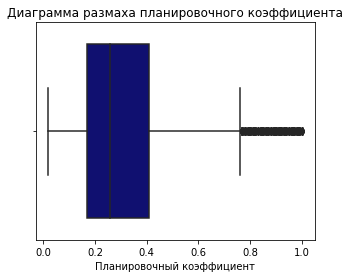

In [21]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Floor Area Ratio'], color = 'navy')

plt.title('Диаграмма размаха планировочного коэффициента')
plt.xlabel('Планировочный коэффициент')

plt.show()

### Параметр Number of floors

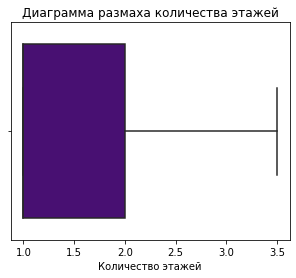

In [22]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Number of floors'], color = 'indigo')

plt.title('Диаграмма размаха количества этажей')
plt.xlabel('Количество этажей')

plt.show()

Самое большое значение - три с половиной этажа. 50% домов имеют 1, 1.5 и 2 этажа.  

---

### Параметр Distance from the airport

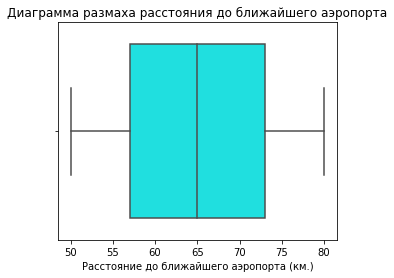

In [23]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(df['Distance from the airport'], color = 'cyan')

plt.title('Диаграмма размаха расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта (км.)')

plt.show()

В Индии аж 27 аэропортов. В основном все дома из выборки расположены от них недалеко, 50% домов находятся на расстоянии от 57 до 73 км.

---

Другие параметры: **Waterfront present** (принимает два значения - 0 и 1), **Average views number** (принимает целочисленные значения от 1 до 4), **Condition of the house** (принимает целочиленные значения от 1 до 5), **Built Year** (год постройки), **House Age** (возраст дома в годах), **Renovation Year** (указывается год постройки дома, если реновации не было, год реновации - если она была), **Postal Code** (нумерация почтовых индексов), **Number of schools nearby** (количество школ поблизости, принимает целочисленные значения от 1 до 3).

### Параметр  Waterfront present

In [24]:
df['Waterfront present'].value_counts()

0    12544
1       48
Name: Waterfront present, dtype: int64

Посмотрим на процентное соотношение домов в зависимости от их расположения:

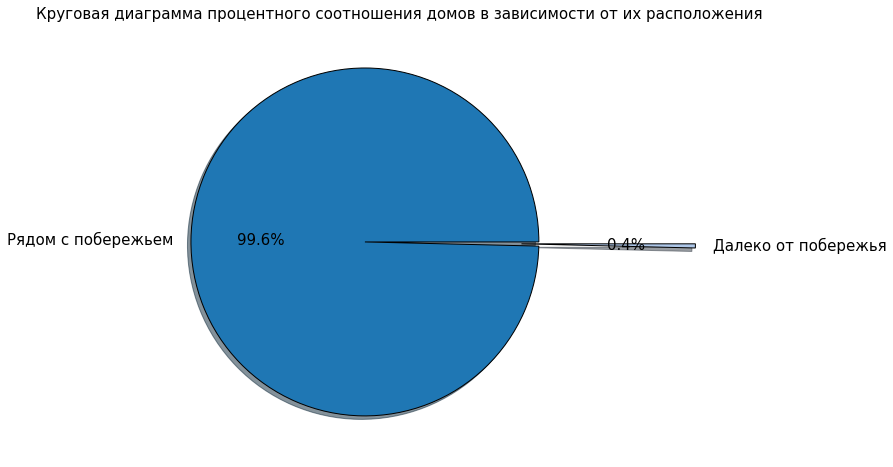

In [25]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.pie(df['Waterfront present'].value_counts(), labels = ['Рядом с побережьем', 'Далеко от побережья'],
        colors = sns.color_palette('tab20'), autopct = '%1.1f%%', explode = [0.2, 0.7],
        shadow = True, wedgeprops = {'lw': 1, 'ls': '-','edgecolor': 'black'}, textprops = {'fontsize': 15})

plt.title('Круговая диаграмма процентного соотношения домов в зависимости от их расположения', fontsize = 15)
plt.show()

Всего 0.4% домов от общего числа находятся далеко от береговой линии.

---

### Параметр Average views number

In [26]:
df['Average views number'].value_counts()

0    11509
2      513
3      258
1      189
4      123
Name: Average views number, dtype: int64

Посмотрим на процентное соотношение домов в зависимости от количества его просмотров:

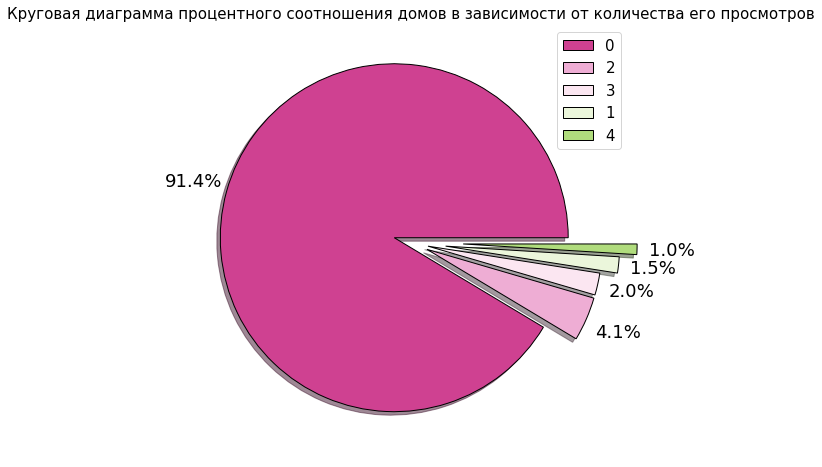

In [27]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.pie(df['Average views number'].value_counts(), labeldistance = None, 
        colors = sns.color_palette('PiYG'), autopct = '%1.1f%%', explode = [0.1, 0.1, 0.1, 0.2, 0.3],
        shadow = True, wedgeprops = {'lw':1, 'ls':'-','edgecolor':"black"}, textprops = {'fontsize': 18}, pctdistance = 1.2)

plt.title('Круговая диаграмма процентного соотношения домов в зависимости от количества его просмотров', fontsize = 15)
plt.legend(['0', '2', '3', '1', '4'], fontsize = 15)
plt.show()

Как видно по диаграмме большинство (91.4%) домов набрало нулевые просмотры на сайте (значения округлялись). Меньше всего (1.0%) домов со средним количеством просмотров равным 4.

---

### Параметр Condition of the house

In [28]:
df['Condition of the house'].value_counts()

3    7909
4    3428
5    1160
2      81
1      14
Name: Condition of the house, dtype: int64

Посмотрим на процентное соотношение домов в зависимости от оценки его условий:

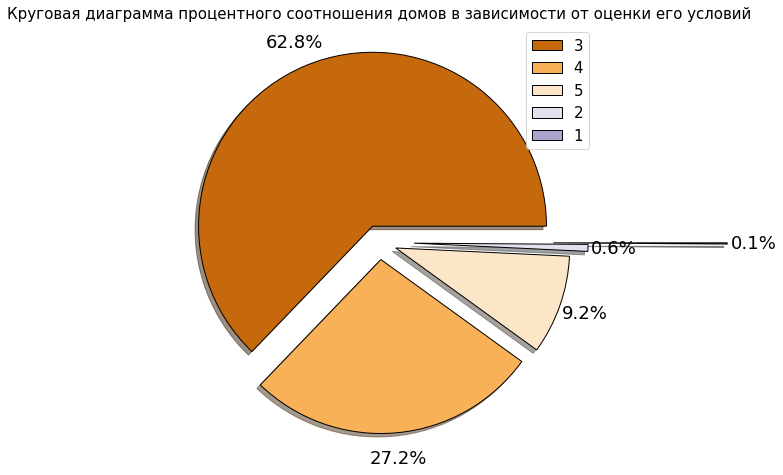

In [29]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.pie(df['Condition of the house'].value_counts(), labeldistance = None, 
        colors = sns.color_palette('PuOr'), autopct = '%1.1f%%', explode = [0.1, 0.1, 0.1, 0.2, 1],
        shadow = True, wedgeprops = {'lw':1, 'ls':'-','edgecolor':"black"}, textprops = {'fontsize': 18}, pctdistance = 1.15)

plt.title('Круговая диаграмма процентного соотношения домов в зависимости от оценки его условий', fontsize = 15)
plt.legend(['3', '4', '5', '2', '1'], fontsize = 15)
plt.show()

Больше всего у нас домов с оценкой 3 (62.8 %), меньше всего домов с оценкой 1 и 2 (в сумме 0.7 % от общего числа).

---

### Параметр Built Year

Построим *столбчатую диаграмму* для того, чтобы посмотреть распределение домов в зависимости от года постройки:

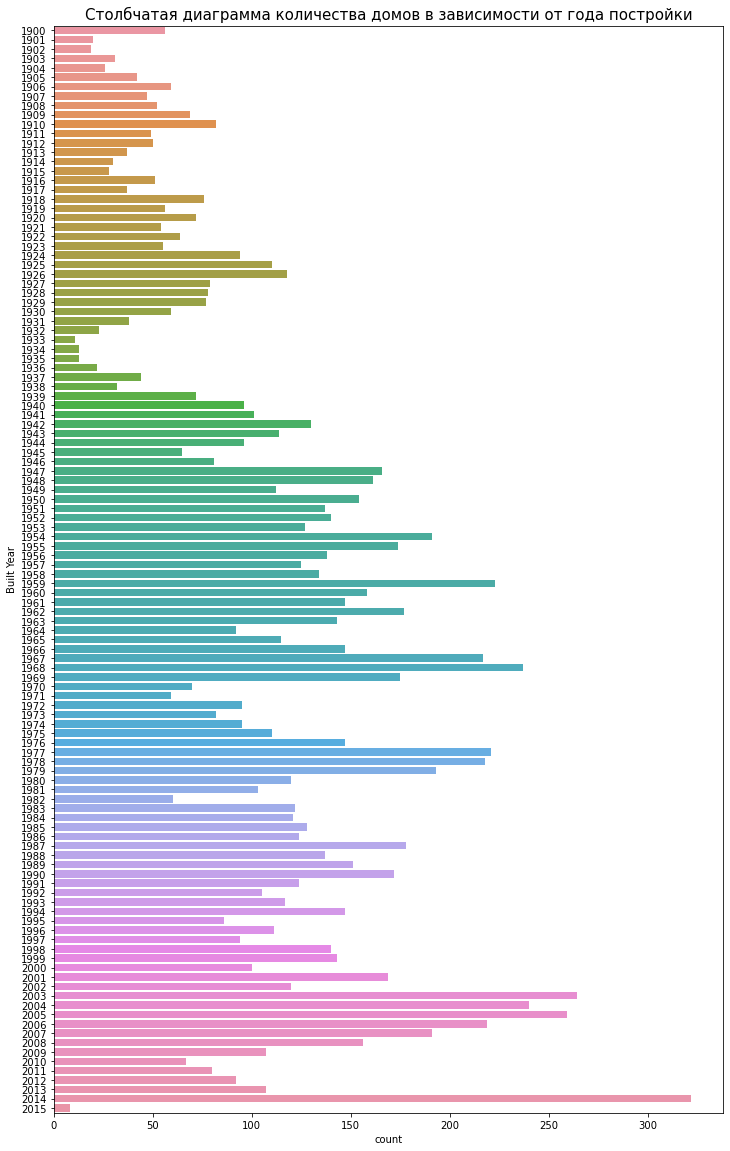

In [30]:
fig, ax = plt.subplots(figsize = (12, 20))

sns.countplot(y = 'Built Year', data = df)
plt.title('Столбчатая диаграмма количества домов в зависимости от года постройки', fontsize = 15)
plt.show()

Больше всего продающихся домов было построено в 2014 и в 2003 году. Дома относительно новые.

---

### Параметр Number of schools nearby

In [31]:
df['Number of schools nearby'].value_counts()

3    4272
2    4194
1    4126
Name: Number of schools nearby, dtype: int64

Посмотрим на процентное соотношение домов в зависимости от количества школ поблизости:

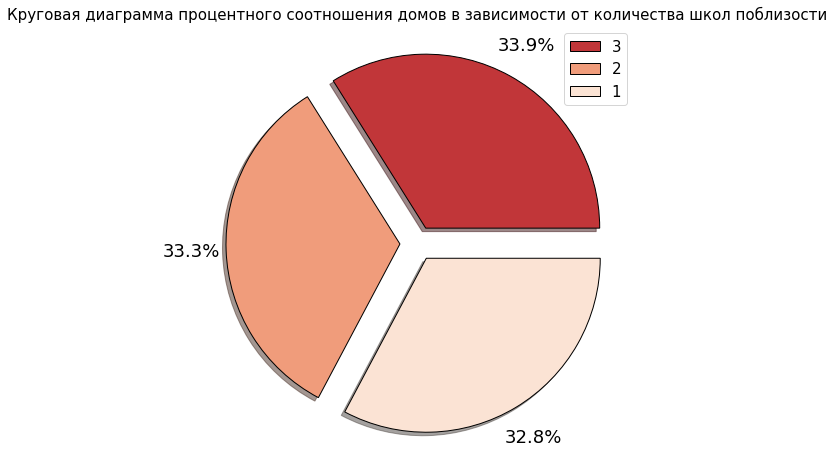

In [32]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.pie(df['Number of schools nearby'].value_counts(), labeldistance = None, 
        colors = sns.color_palette('RdBu'), autopct = '%1.1f%%', explode = [0.1, 0.1, 0.1],
        shadow = True, wedgeprops = {'lw':1, 'ls':'-','edgecolor':"black"}, textprops = {'fontsize': 18}, pctdistance = 1.2)

plt.title('Круговая диаграмма процентного соотношения домов в зависимости от количества школ поблизости', fontsize = 15)
plt.legend(['3', '2', '1'], fontsize = 15)
plt.show()

Примерно одинаковое количество школ (по одной трети) имеют 1, 2, 3 школы рядом.

---

### Параметр Was Renovated

In [33]:
df['Was Renovated'].value_counts()

No     12042
Yes      550
Name: Was Renovated, dtype: int64

Посмотрим на процентное соотношение домов, которые попадали под программу реновации, и которые не попадали под программу реновации:

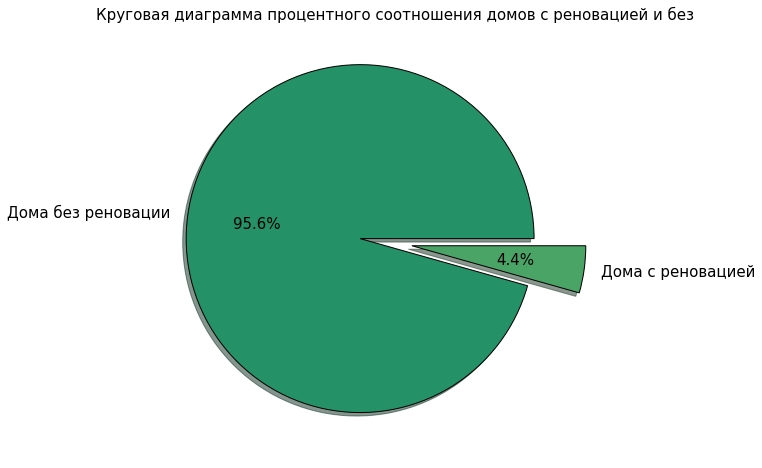

In [34]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.pie(df['Was Renovated'].value_counts(), labels = ['Дома без реновации', 'Дома с реновацией'],
        colors = sns.color_palette('summer'), autopct = '%1.1f%%', explode = [0.2, 0.1],
        shadow = True, wedgeprops = {'lw': 1, 'ls': '-','edgecolor': 'black'}, textprops = {'fontsize': 15})

plt.title('Круговая диаграмма процентного соотношения домов с реновацией и без', fontsize = 15)
plt.show()

Всего 4.4% домов от общего числа обновлялись.

---

In [35]:
df.describe().T

count           mean            std        min  \
Number of bedrooms         12592.0       3.370156       0.935609       1.00   
Number of bathrooms        12592.0       2.376588       0.887448       1.00   
Living area                12592.0    2008.445124     802.636914     370.00   
Lot area                   12592.0    8007.322348    4220.228183     772.00   
Average Room Size          12592.0     599.498968     193.395594      49.00   
Floor Area Ratio           12592.0       0.313269       0.188291       0.02   
Number of floors           12592.0       1.451358       0.506173       1.00   
Waterfront present         12592.0       0.003812       0.061626       0.00   
Average views number       12592.0       0.197030       0.692734       0.00   
Condition of the house     12592.0       3.447824       0.671635       1.00   
Built Year                 12592.0    1968.835292      29.583018    1900.00   
House Age                  12592.0      54.164708      29.583018       8.00   
Renovation Year            12592.0    1971.397713      29.142248    1900.00   
Postal Code                12592.0  122032.937262      19.211125  122003.00   
Number of schools nearby   12592.0       2.011595       0.816609       1.00   
Distance from the airport  12592.0      64.934800       8.952444      50.00   
Price                      12592.0  496918.563135  257636.150590   78000.00   

                                 25%        50%        75%        max  
Number of bedrooms              3.00       3.00       4.00       33.0  
Number of bathrooms             2.00       2.00       3.00        8.0  
Living area                  1418.25    1890.00    2480.00     7350.0  
Lot area                     5040.00    7350.00    9687.00    27311.0  
Average Room Size             463.00     567.00     700.00     2880.0  
Floor Area Ratio                0.17       0.26       0.41        1.0  
Number of floors                1.00       1.00       2.00        3.5  
Waterfront present              0.00       0.00       0.00        1.0  
Average views number            0.00       0.00       0.00        4.0  
Condition of the house          3.00       3.00       4.00        5.0  
Built Year                   1949.00    1969.00    1994.00     2015.0  
House Age                      29.00      54.00      74.00      123.0  
Renovation Year              1952.00    1975.00    1997.00     2015.0  
Postal Code                122016.00  122032.00  122049.00   122072.0  
Number of schools nearby        1.00       2.00       3.00        3.0  
Distance from the airport      57.00      65.00      73.00       80.0  
Price                      310000.00  435000.00  620000.00  1610000.0

In [36]:
df

Number of bedrooms  Number of bathrooms  Living area  Lot area  \
1                       4                    3         2920      4000   
2                       5                    3         2910      9480   
4                       3                    2         2710      4500   
5                       3                    3         2600      4750   
6                       5                    4         3660     11995   
...                   ...                  ...          ...       ...   
14615                   2                    2         1556     20000   
14616                   3                    2         1680      7000   
14617                   2                    1         1070      6120   
14618                   4                    1         1030      6621   
14619                   3                    1          900      4770   

       Average Room Size  Floor Area Ratio  Number of floors  \
1                    730              0.73               1.5   
2                    582              0.31               1.5   
4                    903              0.60               1.5   
5                    866              0.55               1.0   
6                    732              0.31               2.0   
...                  ...               ...               ...   
14615                778              0.08               1.0   
14616                560              0.24               1.5   
14617                535              0.17               1.0   
14618                257              0.16               1.0   
14619                300              0.19               1.0   

       Waterfront present  Average views number  Condition of the house  \
1                       0                     0                       5   
2                       0                     0                       3   
4                       0                     0                       4   
5                       0                     0                       4   
6                       0                     2                       3   
...                   ...                   ...                     ...   
14615                   0                     0                       4   
14616                   0                     0                       4   
14617                   0                     0                       3   
14618                   0                     0                       4   
14619                   0                     0                       3   

       Built Year  House Age  Renovation Year Was Renovated  Postal Code  \
1            1909        114             1909            No       122004   
2            1939         84             1939            No       122004   
4            1929         94             1929            No       122006   
5            1951         72             1951            No       122007   
6            2006         17             2006            No       122008   
...           ...        ...              ...           ...          ...   
14615        1957         66             1957            No       122066   
14616        1968         55             1968            No       122072   
14617        1962         61             1962            No       122056   
14618        1955         68             1955            No       122042   
14619        1969         54             2009           Yes       122018   

       Number of schools nearby  Distance from the airport    Price  
1                             2                         51  1400000  
2                             1                         53  1200000  
4                             1                         51   805000  
5                             1                         67   790000  
6                             3                         72   785000  
...                         ...                        ...      ...  
14615                         3                         7

---

## Жарим пока не пожарим, визуализируем пока не поймём

Давайте продолжим исследовать наши данные. Построим *корреляционную матрицу (тепловую карту)* для наших параметров. Так как она симметрична относительно своей диагонали, оставим все значения, что находятся ниже диагонали. Так данные считываются легче:

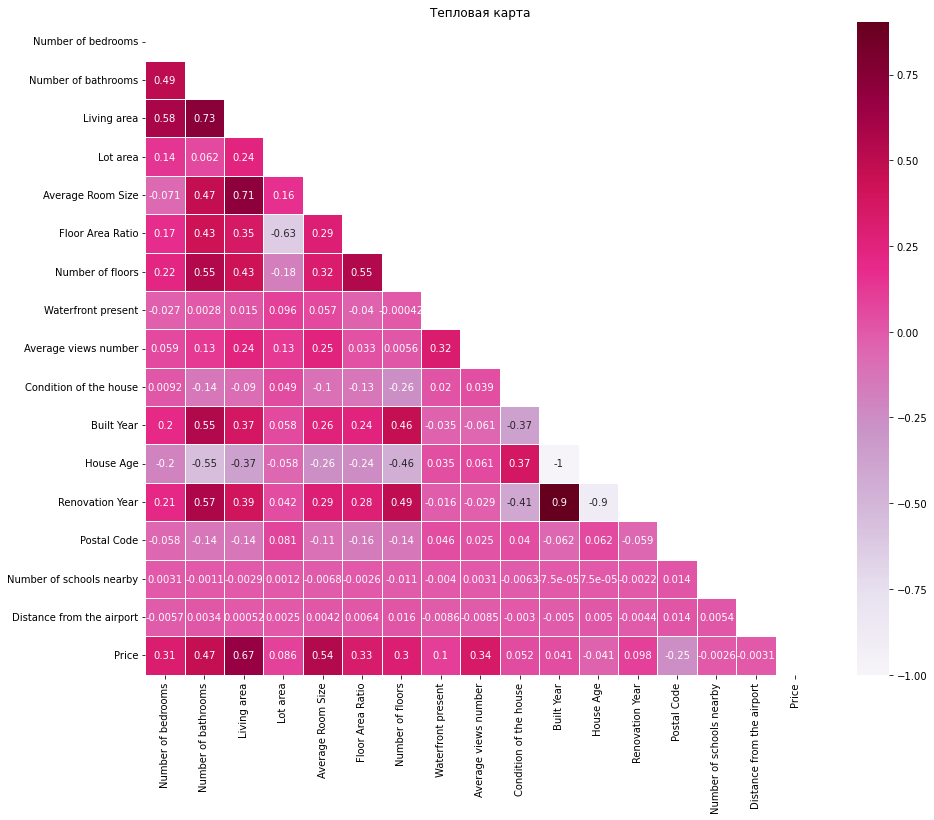

In [37]:
plt.figure(figsize = (15, 12))

mask = np.triu(df.corr()) # возвращаем нижний треугольник матрицы
# указываем аргумент маски у тепловой карты
sns.heatmap(df.corr(), mask = mask, annot = True, cmap = 'PuRd', linecolor = 'white', linewidths = 1) 

plt.title('Тепловая карта')
plt.show()

Построенная *тепловая карта* позволяет сделать следующие выводы о взаимосвязи наших параметров: 

- Между **ценой** и **жилой площадью** наблюдается самая высокая положительная корреляция **(0,67)**. Очевидно существует тренд, что дома с большей жилой площадью стоят дороже. 
- Между **жилой площадью** и **средней площадью комнаты** существует достаточно высокая положительная корреляция **(0,71)**. Это позволяет сделать вывод, что чем больше жилая площадь дома, тем больше средний размер комнаты.
- Между **средней площадью комнаты** и **ценой** также наблюдается высокая положительная корреляция **(0,54)**. Эта взаимосвязь вытекает из прошлого вывода: чем большей жилая площадь дома, тем больше средний размер комнаты, тем выше рыночная стоимость дома. 
- Между **количеством спальных комнат** и **жилой площадью** тоже видна высокая положительная корреляция **(0,58)**. Можно сделать вывод, чем больше спален, тем больше жилая площадь.



  Средняя положительная корреляция наблюдается: 
- Между **ценой** и **количеством ванных комнат** **(0,47)**. Как мы помним, ванные комнаты не относятся к жилой площади, однако, как оказалось, у **жилой площади** (которая положительно коррелирует с ценой) и **количеством ванных комнат** высокая положительная корреляция **(0,73)**, поэтому чем больше их количество, тем выше рыночная стоимость недвижимости.
- Между **ценой** и **количеством спален** **(0,31)**. Она ниже, чем между ценой и количеством ванных комнат, так как коэффицинт корелляции у жилой площади и количеством комнат ниже **(0,58 против 0,73)**. 
- Между **ценой** и **средним количеством просмотров нежвижимости на сайте** **(0,34)**. Такое значение корреляции позволяет сделать вывод, что на сайте мало просматриваются дома с низкой рыночной ценой. 


Очень высокая положительная корреляция наблюдается между параметрами года постройки дома и годом его реновации - **0,91**. Это неудивительно, так как нули реновации (если реновация не проводилась) мы заполнили годами постройки. Также неудивительна корреляция равная **-1** между годом постройки и возрастом дома. 



Интересно было заметить, что между **годом реновации** и **количеством ванных комнат**, а также между **годом реновации** и **количеством этажей** есть заметная положительная корреляция - **0,57 и 0,49** соответсвенно. Это позволило сделать вывод - чем более новее дом, тем больше в нем этажей и ванных комнат. Раньше высоких домов не строили, тем более с большим количеством ванных. 



А вот что оказалось удивительным лично для меня, так это высокая корреляция между **количеством этажей** и **планировочным коэффициентом (0,55)**. Как мы помним, чем больше планировочный коэффициент, тем экономичнее планировка дома, и наоборот. Таким образом, чем большей этажей в доме, тем более экономичная у него планировка. 

---

Давайте изучим найденные взаимосвязи между *ценой* и другими параметрами подробнее.

## Цена и количество спален

Между параметрами наблюдается умеренная положительная связь. Коэффициент корреляции между параметрами:

In [38]:
round(np.corrcoef(df['Price'], df['Number of bedrooms'])[0, 1], 3)

0.31

Построим *столбчатую диаграмму* для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от количества спальных комнат:

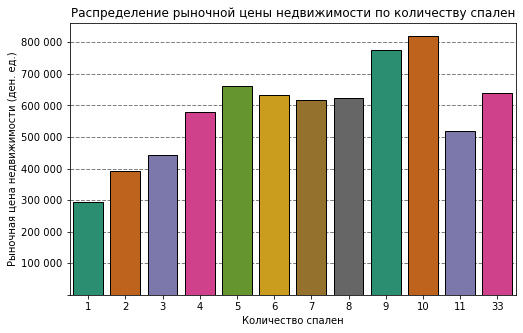

In [39]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.barplot(data = df , x = 'Number of bedrooms', y = 'Price', ci = None, 
            palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1) # добавляем сеточку 

ax.set_axisbelow(True) # делаем так, чтобы сеточка была снизу
ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000',
                    '500 000', '600 000', '700 000', '800 000'])

plt.title('Распределение рыночной цены недвижимости по количеству спален')
plt.xlabel('Количество спален')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

In [40]:
df['Number of bedrooms'].value_counts()

3     5701
4     4077
2     1608
5      916
6      137
1      119
7       20
8        6
9        3
10       3
33       1
11       1
Name: Number of bedrooms, dtype: int64

Диаграмма помогла объяснить невысокий коэффициент корреляции: 

При увеличении количества комнат от 1 до 5 значительно увеличивается рыночная стоимость дома. При этом средняя рыночная стоимость дома варьируется незначительно при наличии 5-8 спален. Однако есть сильный скачок цены при переходе от 8 до 9-10 комнат. Единичные дома с 11 и 33 комнатами портят коэффициент, они продаются по относительно низкой цене.

---

## Цена и количество ванных комнат

Связь между параметрами средняя, положительная. Коэффициент корреляции между параметрами:

In [41]:
round(np.corrcoef(df['Price'], df['Number of bathrooms'])[0, 1], 3)

0.47

Построим столбчатую диаграмму для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от количества ванных комнат:

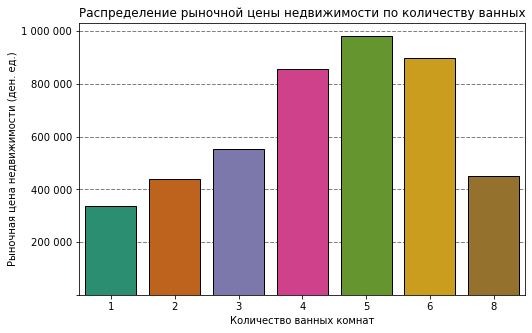

In [42]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.barplot(data = df , x = 'Number of bathrooms', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

ax.set_axisbelow(True)
ax.set_yticklabels([' ', '200 000', '400 000', '600 000', '800 000', '1 000 000'])

plt.title('Распределение рыночной цены недвижимости по количеству ванных')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

In [43]:
df['Number of bathrooms'].value_counts()

3    5379
2    3931
1    2431
4     770
5      72
6       8
8       1
Name: Number of bathrooms, dtype: int64

Посмотрев на визуализацию становится ясно, что рыночная стоимость увеличивается при увеличении количества ванных комнат. 

При этом наблюдается большой скачок средней рыночной стоимости недвижимости при переходе от 3 до 4 ванных комнат. При наличии 4-6 ванных цена варьируется незначительно, примерно в 100 000 ден. ед. Коэффициент корреляции также портит единственный дом с 8 ванными комнатами, продающийся по низкой рыночной цене (такая же как средняя рыночная цена домов с 2 ванными).

## Цена и жилая площадь

Связь между параметрами довольно высокая, положительная. Коэффициент корреляции между параметрами:

In [44]:
round(np.corrcoef(df['Price'], df['Living area'])[0, 1], 3)

0.669

Давайте построим *диаграмму рассеяния* для этих двух параметров:

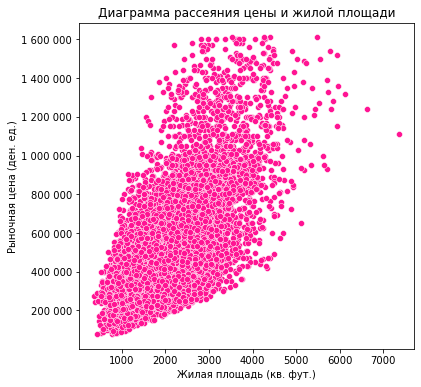

In [45]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.scatterplot(data = df, x = 'Living area', y = 'Price', color = 'deeppink')

ax.set_yticklabels([' ', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])

plt.title('Диаграмма рассеяния цены и жилой площади')
plt.xlabel('Жилая площадь (кв. фут.)')
plt.ylabel('Рыночная цена (ден. ед.)')

plt.show()

Построим совместное распределение по-другому:

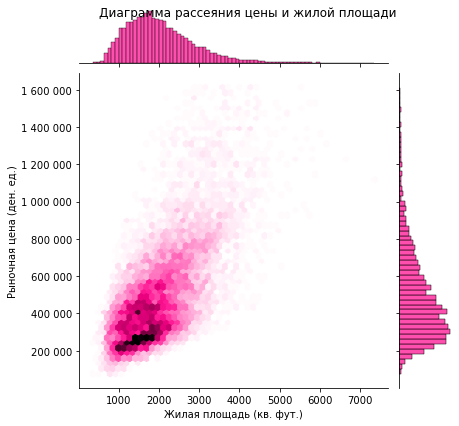

In [46]:
fig = sns.jointplot(data = df, x = 'Living area', y = 'Price', kind = 'hex', color = 'deeppink')

fig.ax_joint.set_yticklabels([' ', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])

fig.fig.suptitle('Диаграмма рассеяния цены и жилой площади')
plt.xlabel('Жилая площадь (кв. фут.)')
plt.ylabel('Рыночная цена (ден. ед.)')

plt.show()

Здесь уже явно прослеживается высокая положительная корреляция - с увеличением жилой площади дома растёт его рыночная стоимость (виден линейный тренд почти под 45 градусов). Коэффициент корреляции не такой высокий, так как виден разброс в цене на одну и ту же жилую площадь примерно в 200 000 ден. ед.

---

## Цена и общая площадь участка

Связь между параметрами о-о-очень слабая, практически отсутствует. Коэффициент корреляции:

In [47]:
round(np.corrcoef(df['Price'], df['Lot area'])[0, 1], 3)

0.086

Строим диаграмму рассеяния для этих двух параметров:

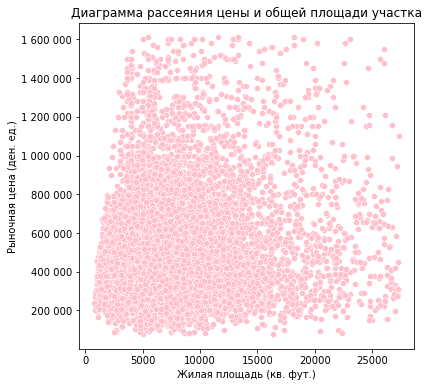

In [48]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.scatterplot(data = df, x = 'Lot area', y = 'Price', color = 'pink')

ax.set_yticklabels([' ', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])

plt.title('Диаграмма рассеяния цены и общей площади участка')
plt.xlabel('Жилая площадь (кв. фут.)')
plt.ylabel('Рыночная цена (ден. ед.)')

plt.show()

Дополнительно строим:

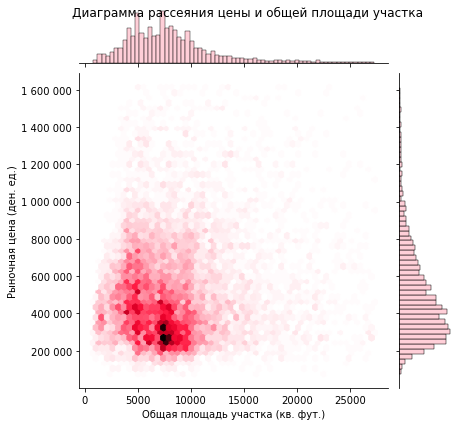

In [49]:
fig = sns.jointplot(data = df, x = 'Lot area', y = 'Price', kind = 'hex', color = 'pink')

fig.ax_joint.set_yticklabels([' ', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])

fig.fig.suptitle('Диаграмма рассеяния цены и общей площади участка')
plt.xlabel('Общая площадь участка (кв. фут.)')
plt.ylabel('Рыночная цена (ден. ед.)')

plt.show()

Как мы видим, площадь самого участка большую роль при формировании цены не играет. При диапазоне от 5 000 до 10 000 кв.м. сильно варируются цены. На дома одной и той же квадратуры может быть совершенно разная цена в большом диапазоне (отлично проселживается вертикальный тренд на диаграмме). При этом участки с очень большой площадью (> 15 000 кв.м.) высоких цен не имеют (прослеживается скопление точек в нижней части диаграммы). 

---

## Цена и средний размер комнаты

Связь между параметрами высокая, положительная. Коэффициент корреляции между параметрами:

In [50]:
round(np.corrcoef(df['Price'], df['Average Room Size'])[0, 1], 3)

0.544

Строим диаграмму рассеяния для этих двух параметров:

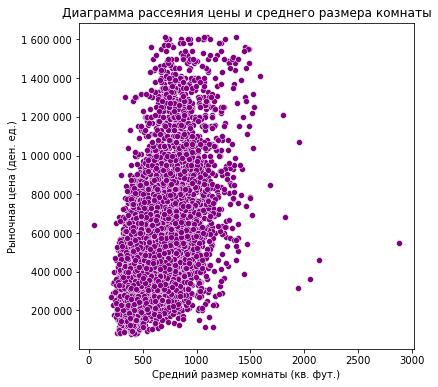

In [51]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.scatterplot(data = df, x = 'Average Room Size', y = 'Price', color = 'purple')

ax.set_yticklabels([' ', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])

plt.title('Диаграмма рассеяния цены и среднего размера комнаты')
plt.xlabel('Средний размер комнаты (кв. фут.)')
plt.ylabel('Рыночная цена (ден. ед.)')

plt.show()

Дополнительно строим:

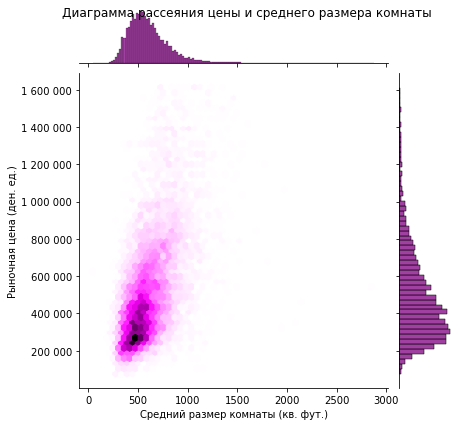

In [52]:
fig = sns.jointplot(data = df, x = 'Average Room Size', y = 'Price', kind = 'hex', color = 'purple')

fig.ax_joint.set_yticklabels([' ', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])

fig.fig.suptitle('Диаграмма рассеяния цены и среднего размера комнаты')
plt.xlabel('Средний размер комнаты (кв. фут.)')
plt.ylabel('Рыночная цена (ден. ед.)')

plt.show()

Тут отчётливо виден тренд, что с увеличением среднего размера комнаты увеличивается стоимость недвижимости. Однако коэффициент корреляции не очень высокий, так как прослеживается разброс цены тоже примерно в 200 000 денежных едениц на одно и то же значение среднего размера комнаты. Также можно заметить значительное скопление точек в верхней части диаграммы - недвижимость, продающаяся по высокой цене, в основном имеет среднюю площадь комнаты от 600 до 1000 кв. м.). С большой средней площадью комнаты (> 2 000 кв. фут.) дома продаются по относительно низкой цене).

---

## Цена и планировочный коэффициент

Между параметрами наблюдается умеренная положительная связь. Коэффициент корреляции между параметрами:

In [53]:
round(np.corrcoef(df['Price'], df['Floor Area Ratio'])[0, 1], 3)

0.327

Строим диаграмму рассеяния для этих двух параметров:

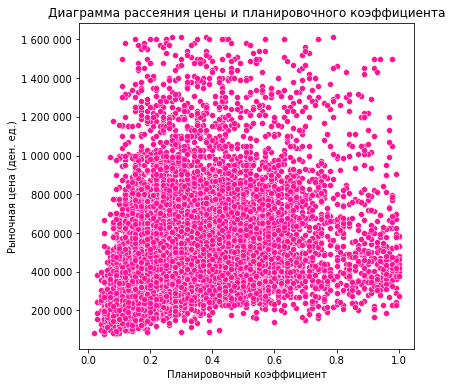

In [54]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.scatterplot(data = df, x = 'Floor Area Ratio', y = 'Price', color = 'deeppink')

ax.set_yticklabels([' ', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])

plt.title('Диаграмма рассеяния цены и планировочного коэффициента')
plt.xlabel('Планировочный коэффициент')
plt.ylabel('Рыночная цена (ден. ед.)')

plt.show()

Дополнительно строим:

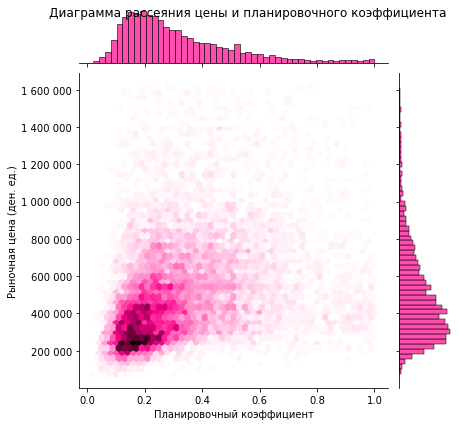

In [55]:
fig = sns.jointplot(data = df, x = 'Floor Area Ratio', y = 'Price', kind = 'hex', color = 'deeppink')

fig.ax_joint.set_yticklabels([' ', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])

fig.fig.suptitle('Диаграмма рассеяния цены и планировочного коэффициента')
plt.xlabel('Планировочный коэффициент')
plt.ylabel('Рыночная цена (ден. ед.)')

plt.show()

По построенной диаграмме можно заметить, что самое большое скопление точек происходит в нижней левой части - большинство продающихся домов имеют низкую цену от 200 000 до 500 000 ден. ед. с планировочным коэффициентом от 0,1 до 0,3 (дома комфортабельные). Ещё можно заметить скопление точек в правой нижней части - дома с большим планировочным коэффициентом (экономичные дома) продаются только по небольшой цене. 

---

## Цена и количество этажей

Между параметрами наблюдается слабая положительная связь. Коэффициент корреляции между параметрами:

In [56]:
round(np.corrcoef(df['Price'], df['Number of floors'])[0, 1], 3)

0.305

Строим столбчатую диаграмму для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от количества этажей:

In [57]:
df['Number of floors'].value_counts()

1.0    6535
2.0    4656
1.5    1161
3.0     172
2.5      67
3.5       1
Name: Number of floors, dtype: int64

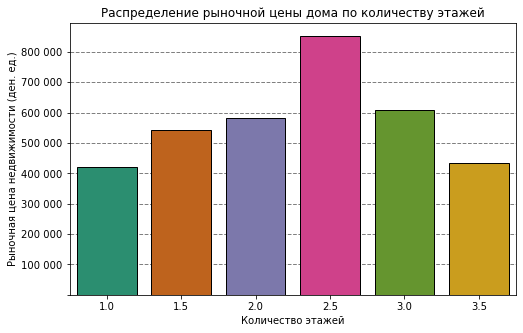

In [58]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(data = df , x = 'Number of floors', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000', '500 000', '600 000', '700 000', '800 000'])
ax.set_axisbelow(True)

plt.title('Распределение рыночной цены дома по количеству этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

Незначительно повышается цена при переходе от 1 этажа до 2 этажей. При 3 и 3.5 этажах (причём у нас только один дом с 3.5 этажами) она остаётся на том же уровне - около 500 000 ден. ед. Резко выбивается из тренда средняя рыночная стоимость недвижимости с 2.5 этажами - очевидно, что самая дорогая недвижимость имеет два с половиной этажа.

---

## Цена и наличие побережья рядом

In [59]:
round(np.corrcoef(df['Price'], df['Waterfront present'])[0, 1], 3)

0.102

Снова строим столбчатую диаграмму для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от наличия (отсутствия) прибрежной полосы рядом:

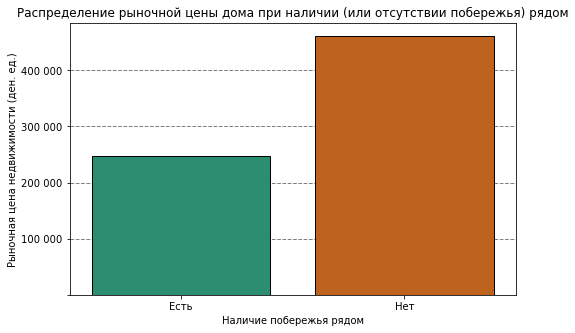

In [60]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(data = df , x = 'Waterfront present', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

ax.set_xticklabels(['Есть', 'Нет'])
ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000', '500 000', '600 000', '700 000', '800 000'])
ax.set_axisbelow(True)

plt.title('Распределение рыночной цены дома при наличии (или отсутствии побережья) рядом')
plt.xlabel('Наличие побережья рядом')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

Взаимосязь прослеживается - дома, стоящие рядом с водой имеют среднюю рыночную цену ниже, чем те, которые находятся вдали от побережья (это не удивительно, на самом деле домов вдали от воды очень мало, всего 48, как мы помним по круговой диаграмме, это ж Индия). Причём разница достаточно большая - около 300 000 ден. ед.

---

## Цена и среднее количество просмотров на сайте

Между параметрами наблюдается заметная положительная связь. Коэффициент корреляции между параметрами:

In [61]:
round(np.corrcoef(df['Price'], df['Average views number'])[0, 1], 3)

0.34

Прибегаем к помощи столбчатой диаграммы для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от среднего количества просмотров на сайте в день:

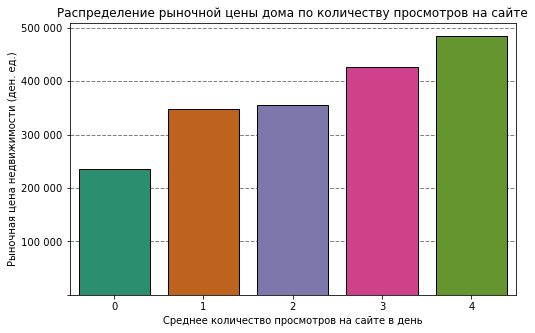

In [62]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(data = df , x = 'Average views number', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000', '500 000', '600 000', '700 000', '800 000'])
ax.set_axisbelow(True)

plt.title('Распределение рыночной цены дома по количеству просмотров на сайте')
plt.xlabel('Среднее количество просмотров на сайте в день')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

Можно увидеть, что при увеличении количества просмотров на сайте увеличивается средняя рыночная стоимость недвижимости - нулевое значение имеют дома с самой низкой средней ценой. Значение, равное четырём, имеют дома со средней рыночной стоимостью равной приблизитной 450 000 ден. ед. Только при значениях 1 и 2 цены примерно равны. 

---

## Цена и состояние дома

Что было удивительно, так это то, что между этими параметрами связь практически отсутствует. Коэффициент корреляции:

In [63]:
round(np.corrcoef(df['Price'], df['Condition of the house'])[0, 1], 3)

0.052

Построим столбчатую диаграмму для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от оценки условий дома:

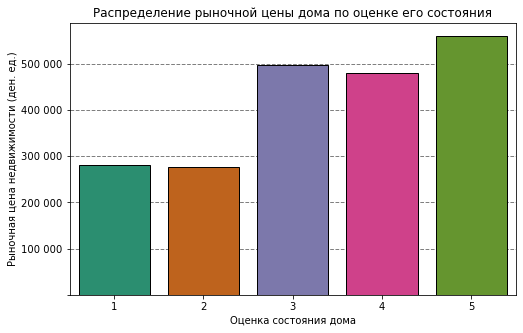

In [64]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(data = df , x = 'Condition of the house', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000', '500 000'])
ax.set_axisbelow(True)

plt.title('Распределение рыночной цены дома по оценке его состояния')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

Стало очевидно почему коэффициент корреляции близок к нулю. Средняя рыночная стоимость дома очень низкая, если состояние дома оценено на 1-2 (около 300 000 ден. ед). При оценке 3-5 средняя рыночная цена примерно равна, но намного выше средних цен на дома с оценками 1 и 2 (приблизительно на 200 000 ден. ед.).

## Цена и район дома

Прибегнем к помощи столбчатой диаграммы для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от района дома:

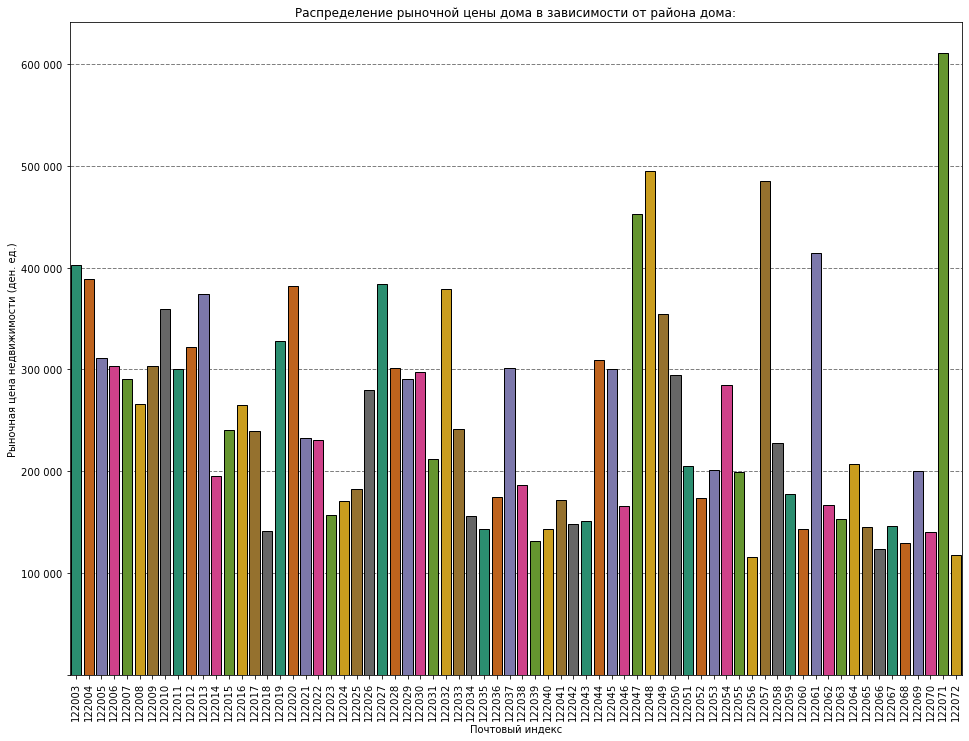

In [65]:
fig, ax = plt.subplots(figsize = (16, 12))
sns.barplot(data = df , x = 'Postal Code', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation = 90)
ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000', '500 000', '600 000'])
ax.set_axisbelow(True)

plt.title('Распределение рыночной цены дома в зависимости от района дома:')
plt.xlabel('Почтовый индекс')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

Диаграмма позволяет нам определить почтовый индекс района с самой дорогой недвижимостью - 122071. Средняя стоимость недвижимости в этом районе около 600 000 ден. ед. Также значительно выделяются районы с почтовым индексом 122048, 122057. Районы с самой дешевой недвижимостью - 122056, 122072 (около 120 000 ден. ед.).

---

## Цена и год постройки

В которой раз обращаемся к столбчатой диаграмме для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от года постройки:

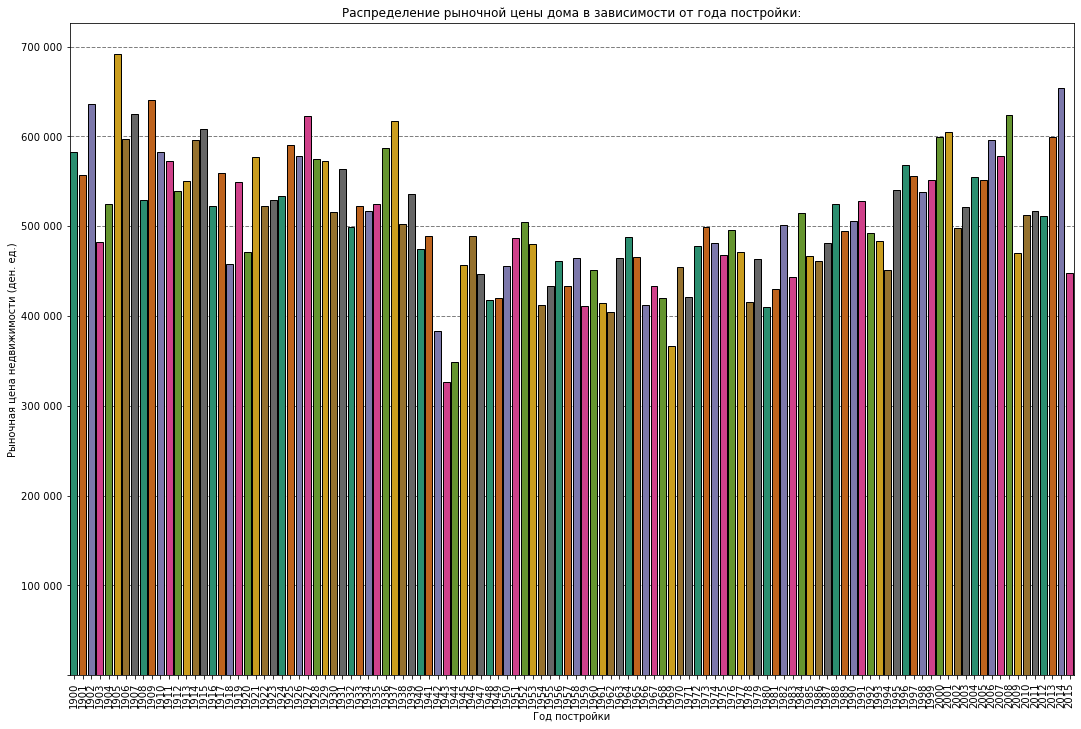

In [66]:
fig, ax = plt.subplots(figsize = (18, 12))
sns.barplot(data = df , x = 'Built Year', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation = 90)
ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000', '500 000', '600 000', '700 000'])
ax.set_axisbelow(True)

plt.title('Распределение рыночной цены дома в зависимости от года постройки:')
plt.xlabel('Год постройки')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

Недвижимость с самой низкой средней рыночной ценой была построена в годы Великой Отечественной войны - 1942 г., 1943 г., 1944 г. Из удивительного, с самой высокой - в 1905 г. (видимо продаётся как раритет) и 2014 г. Что ещё интересно заметить, что рыночные цены старых и новых домов находятся примерно на одном и том же уровне - колебания незначительные.

---

## Цена и реновация

Используем столбчатую диаграмму для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от того, проводилась реновация или нет:

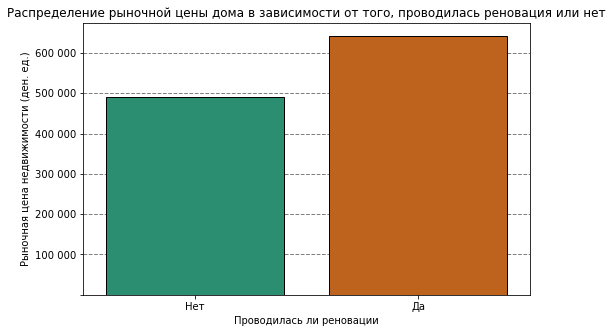

In [67]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(data = df , x = 'Was Renovated', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

ax.set_xticklabels(['Нет', 'Да'])
ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000', '500 000', '600 000'])
ax.set_axisbelow(True)

plt.title('Распределение рыночной цены дома в зависимости от того, проводилась реновация или нет')
plt.xlabel('Проводилась ли реновации')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

Дома, в которых проводилась реновация, имеют среднюю рыночную цену немного выше, чем те дома, в которых реновация не проводилась. Примерно на 110 000 ден. ед.

---

## Цена и количество школ поблизости

Связи между параметрами нет. Коэффициент корреляции близок к нулю с отрицательной стороны:

In [68]:
round(np.corrcoef(df['Price'], df['Number of schools nearby'])[0, 1], 3)

-0.003

Используем столбчатую диаграмму для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от количества школ поблизости:

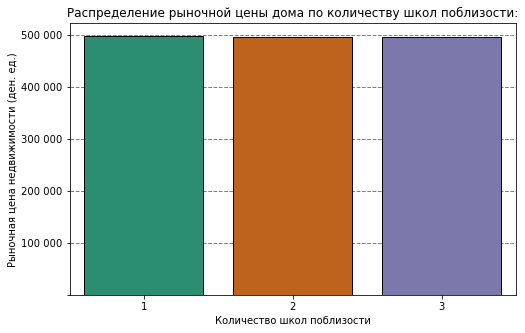

In [69]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(data = df , x = 'Number of schools nearby', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000', '500 000'])
ax.set_axisbelow(True)

plt.title('Распределение рыночной цены дома по количеству школ поблизости:')
plt.xlabel('Количество школ поблизости')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

Как мы видим, вне зависимости от того, сколько школ рядом - 1, 2 или 3 - средняя рыночная стоимость одинаковая, около 500 000 ден. ед. Минус коэффициента корреляции легко объясняется тем, что у первого столбца (одна школа рядом), средняя стоимость чууууть-чуть выше, чем у других. 

---

## Цена и расстояние от аэропорта

Связи между параметрами нет. Коэффициент корреляции практически нулевой:

In [70]:
round(np.corrcoef(df['Price'], df['Distance from the airport'])[0, 1], 3)

-0.003

Используем столбчатую диаграмму для того, чтобы посмотреть распределение средней стоимости недвижимости в зависимости от расстояния дома до аэропорта:

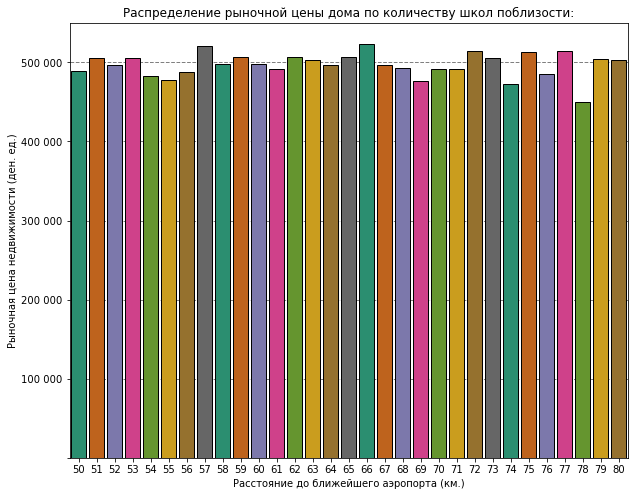

In [71]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(data = df , x = 'Distance from the airport', y = 'Price', ci = None, palette = 'Dark2', linewidth = 1, edgecolor = "black")
plt.grid (axis = 'y', color = 'grey', linestyle = 'dashed', linewidth = 1)

ax.set_yticklabels([' ', '100 000', '200 000', '300 000', '400 000', '500 000'])
ax.set_axisbelow(True)

plt.title('Распределение рыночной цены дома по количеству школ поблизости:')
plt.xlabel('Расстояние до ближейшего аэропорта (км.)')
plt.ylabel('Рыночная цена недвижимости (ден. ед.)')

plt.show()

Как мы видим, вне зависимости от того, какое расстояние у домов до ближайшего аэропорта - средняя рыночная стоимость одинаковая, около 500 000 ден. ед. Минус коэффициента корреляции легко объясняется тем, что у домов, которые находятся на расстоянии 78 км. от взлётной полосы, средняя стоимость немного ниже, чем у других.

---

## Итоги приёма пищи (ой, EDA)

Таким образом, с помощью различных графиков, диаграмм, тепловых карт и функций (а также стоить упомянуть моё божеское терпение, потому что на все визуализации я потратила кучу часов моей жизни), мы нашли различные взаимосвязи между самими параметрами, узнали какие параметры влияют больше всего на цену, и сделали десятки интересных выводов. Выводы вы можете найти по ходу работы, так как их действительно много.

Так как больше всего я хотела узнать, что влияет на формирование цены дома в Индии больше всего, подведу итоги.

Больше всего на цену влияют такие параметры, как:
ь
1. Жилая площадь - положительная корреляция, чем больше жилая площадь, тем выше рыночная цена дома.
2. Количество ванных комнат - положительная корреляция, чем больше ванных комнат, тем выше рыночная цена дома (при этом у количества ванных и жилой площади тоже очень высокая положительная корреляция, а как мы помним, ванные комнаты к жилой площади не относятся). 
3. Количество спален - положительная корреляция, чем больше спальных комнат, тем выше рыночная цена дома (при этом важно помнить факт, что спальни прямо коррелируют с жилой площадью, но к жилой площади также относятся и другие комнаты).
4. Оценка состояния дома - положительная корреляция, чем выше оценка, тем выше рыночная цена дома.

А вот какие гипотезы я буду проверять, и каким способом, а также машинное обучение, вы найдете *в следующей серии...*

---

In [72]:
df.to_csv ('my_data2.csv', index = False)

###### done by meow_lin